In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
data = pd.read_csv(r'/content/BankChurners.csv')

In [3]:
data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [4]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                                                                                                         0
Months_on_book                                                                                                                        0
Total_Relationship_Count                                                                                                              0
Months_Inactive_12_mon                                                                                                                0
Contacts_Count_12_mon                                                                                                                 0
Credit_Limit                                                                                                                          0
Total_Revolving_Bal                                                                                                                   0
Avg_Open_To_Buy                                                                                                                       0
Total_Amt_Chng_Q4_Q1                                                                                                                  0
Total_Trans_Amt                                                                                                                       0
Total_Trans_Ct                                                                                                                        0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Avg_Utilization_Ratio                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2    0
dtype: int64

In [5]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [6]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [7]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [8]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop last two columns (unneeded)
    df = df.drop(df.columns[-2:], axis=1)

    # Drop CLIENTNUM columns
    df = df.drop('CLIENTNUM', axis=1)

    # Encode unknown values as np.nan
    df = df.replace('Unknown', np.nan)

    # Fill ordinal missing values with modes (Education_Level and Income_Category columns)
    df['Education_Level'] = df['Education_Level'].fillna('Graduate')
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')

    # Encode binary columns
    df = binary_encode(df, 'Attrition_Flag', positive_value='Attrited Customer')
    df = binary_encode(df, 'Gender', positive_value='M')

    # Encode ordinal columns
    education_ordering = [
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_ordering = [
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    df = ordinal_encode(df, 'Education_Level', ordering=education_ordering)
    df = ordinal_encode(df, 'Income_Category', ordering=income_ordering)

    # Encode nominal columns
    df = onehot_encode(df, 'Marital_Status', prefix='MS')
    df = onehot_encode(df, 'Card_Category', prefix='CC')

    # Split df into X and y
    y = df['Attrition_Flag'].copy()
    X = df.drop('Attrition_Flag', axis=1).copy()

    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

In [9]:
X, y = preprocess_inputs(data)

In [10]:
X


Customer_Age    Gender  Dependent_count  Education_Level  \
0         -0.165406  1.059956         0.503368        -0.893680   
1          0.333570 -0.943436         2.043199         0.593388   
2          0.583058  1.059956         0.503368         0.593388   
3         -0.789126 -0.943436         1.273283        -0.893680   
4         -0.789126  1.059956         0.503368        -1.637214   
...             ...       ...              ...              ...   
10122      0.458314  1.059956        -0.266547         0.593388   
10123     -0.664382  1.059956        -0.266547         0.593388   
10124     -0.290150 -0.943436        -1.036462        -0.893680   
10125     -2.036565  1.059956        -0.266547         0.593388   
10126     -0.414894 -0.943436        -0.266547         0.593388   

       Income_Category  Months_on_book  Total_Relationship_Count  \
0             0.597300        0.384621                  0.763943   
1            -0.887628        1.010715                  1.407306   
2             1.339764        0.008965                  0.120579   
3            -0.887628       -0.241473                 -0.522785   
4             0.597300       -1.869317                  0.763943   
...                ...             ...                       ...   
10122        -0.145164        0.509840                 -0.522785   
10123        -0.145164       -1.368442                  0.120579   
10124        -0.887628        0.008965                  0.763943   
10125        -0.145164        0.008965                  0.120579   
10126        -0.887628       -1.368442                  1.407306   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
0                   -1.327136               0.492404      0.446622  ...   
1                   -1.327136              -0.411616     -0.041367  ...   
2                   -1.327136              -2.219655     -0.573698  ...   
3                    1.641478              -1.315636     -0.585251  ...   
4                   -1.327136              -2.219655     -0.430877  ...   
...                       ...                    ...           ...  ...   
10122               -0.337598               0.492404     -0.509330  ...   
10123               -0.337598               0.492404     -0.479181  ...   
10124                0.651940               1.396424     -0.354626  ...   
10125                0.651940               0.492404     -0.368710  ...   
10126               -0.337598               1.396424      0.193220  ...   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0           -0.973895             3.834003              -0.775882   
1           -1.357340            12.608573              -0.616276   
2           -1.911206             6.807864              -0.997155   
3           -1.911206             6.807864               1.759686   
4           -1.570365             7.509325              -0.997155   
...               ...                  ...                    ...   
10122        2.221481             0.608119               0.678714   
10123        0.176440            -0.122745               0.856458   
10124       -0.207005             0.444305              -0.997155   
10125       -0.121795             0.041070              -0.997155   
10126       -0.164400            -0.265557              -0.311572   

       MS_Divorced  MS_Married  MS_Single   CC_Blue   CC_Gold  CC_Platinum  \
0        -0.282405    1.077338  -0.798507  0.270611 -0.107644    -0.044484   
1        -0.282405   -0.928214   1.252337  0.270611 -0.107644    -0.044484   
2        -0.282405    1.077338  -0.798507  0.270611 -0.107644    -0.044484   
3        -0.282405   -0.928214  -0.798507  0.270611 -0.107644    -0.044484   
4        -0.282405    1.077338  -0.798507  0.270611 -0.107644    -0.044484   
...            ...         ...        ...       ...       ...          ...   
10122    -0.282405   -0.928214   1.252337  0.270611 -0.107644    -0.044484   
10123     3.541013   -0.928214 

In [11]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [12]:
# Excluding categorical columns
eda_df = pd.concat([X.loc[:, ['Customer_Age', 'Months_on_book']], X.loc[:,'Credit_Limit':'Avg_Utilization_Ratio']], axis=1).copy()

In [13]:
eda_df

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
0         -0.165406        0.384621      0.446622            -0.473422   
1          0.333570        1.010715     -0.041367            -0.366667   
2          0.583058        0.008965     -0.573698            -1.426858   
3         -0.789126       -0.241473     -0.585251             1.661686   
4         -0.789126       -1.869317     -0.430877            -1.426858   
...             ...             ...           ...                  ...   
10122      0.458314        0.509840     -0.509330             0.844455   
10123     -0.664382       -1.368442     -0.479181             1.255524   
10124     -0.290150        0.008965     -0.354626            -1.426858   
10125     -2.036565        0.008965     -0.368710            -1.426858   
10126     -0.414894       -1.368442      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771         3.259358        2.221481   
10123        -0.591639              0.201004         1.283475        0.176440   
10124        -0.226632              0.269436         1.732994       -0.207005   
10125        -0.240713             -1.026208         1.174848       -0.121795   
10126         0.105372             -0.259771         1.733877       -0.164400   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                 3.834003              -0.775882  
1                12.608573              -0.616276  
2                 6.807864              -0.997155  
3                 6.807864               1.759686  
4                 7.509325              -0.997155  
...                    ...                    ...  
10122             0.608119               0.678714  
10123            -0.122745               0.856458  
10124             0.444305              -0.997155  
10125             0.041070              -0.997155  
10126            -0.265557              -0.311572  

[10127 rows x 10 columns]

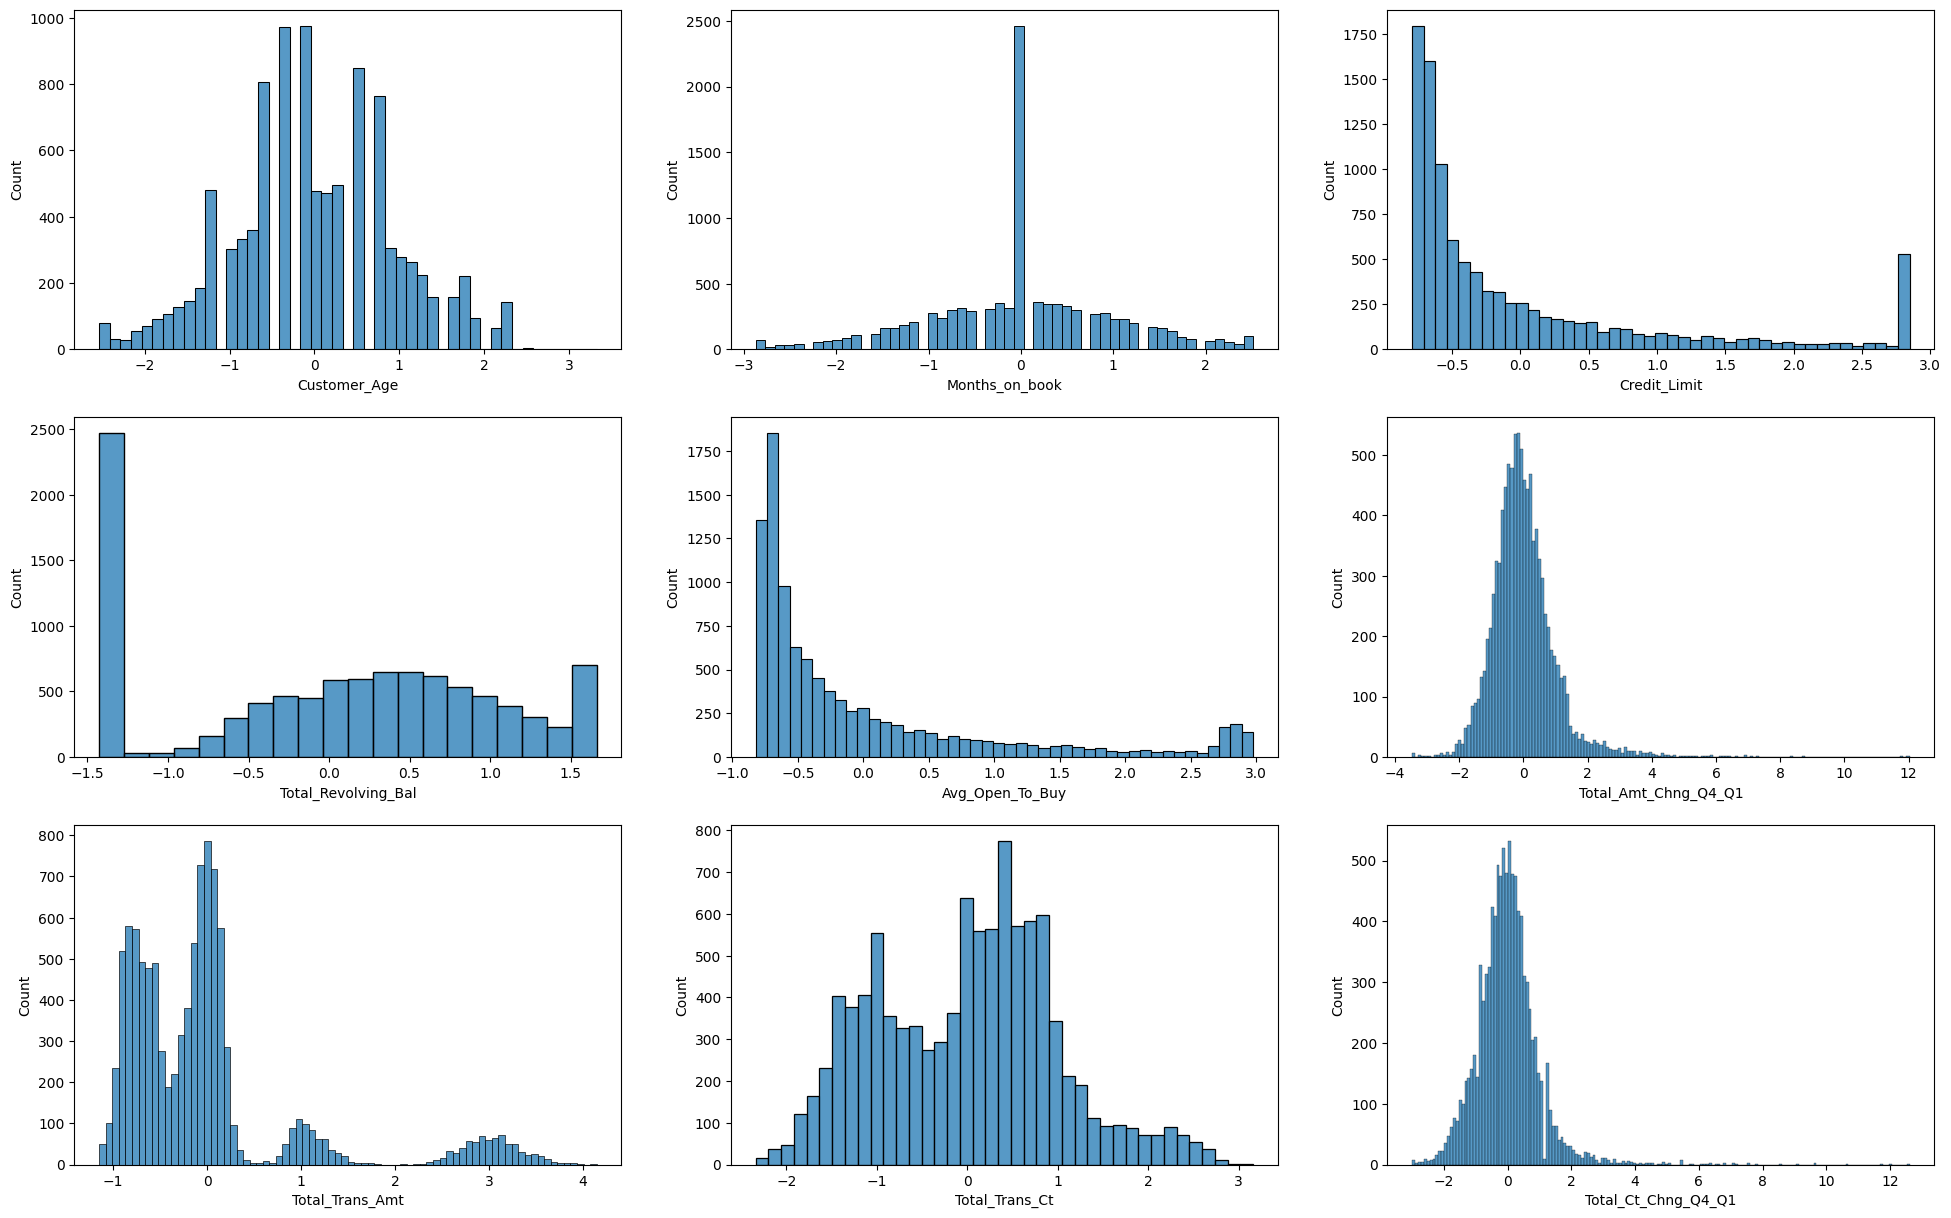

In [14]:
plt.figure(figsize=(24, 15))

for i in range(len(eda_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.histplot(eda_df[eda_df.columns[i]])

plt.show()

<Figure size 2000x2000 with 0 Axes>

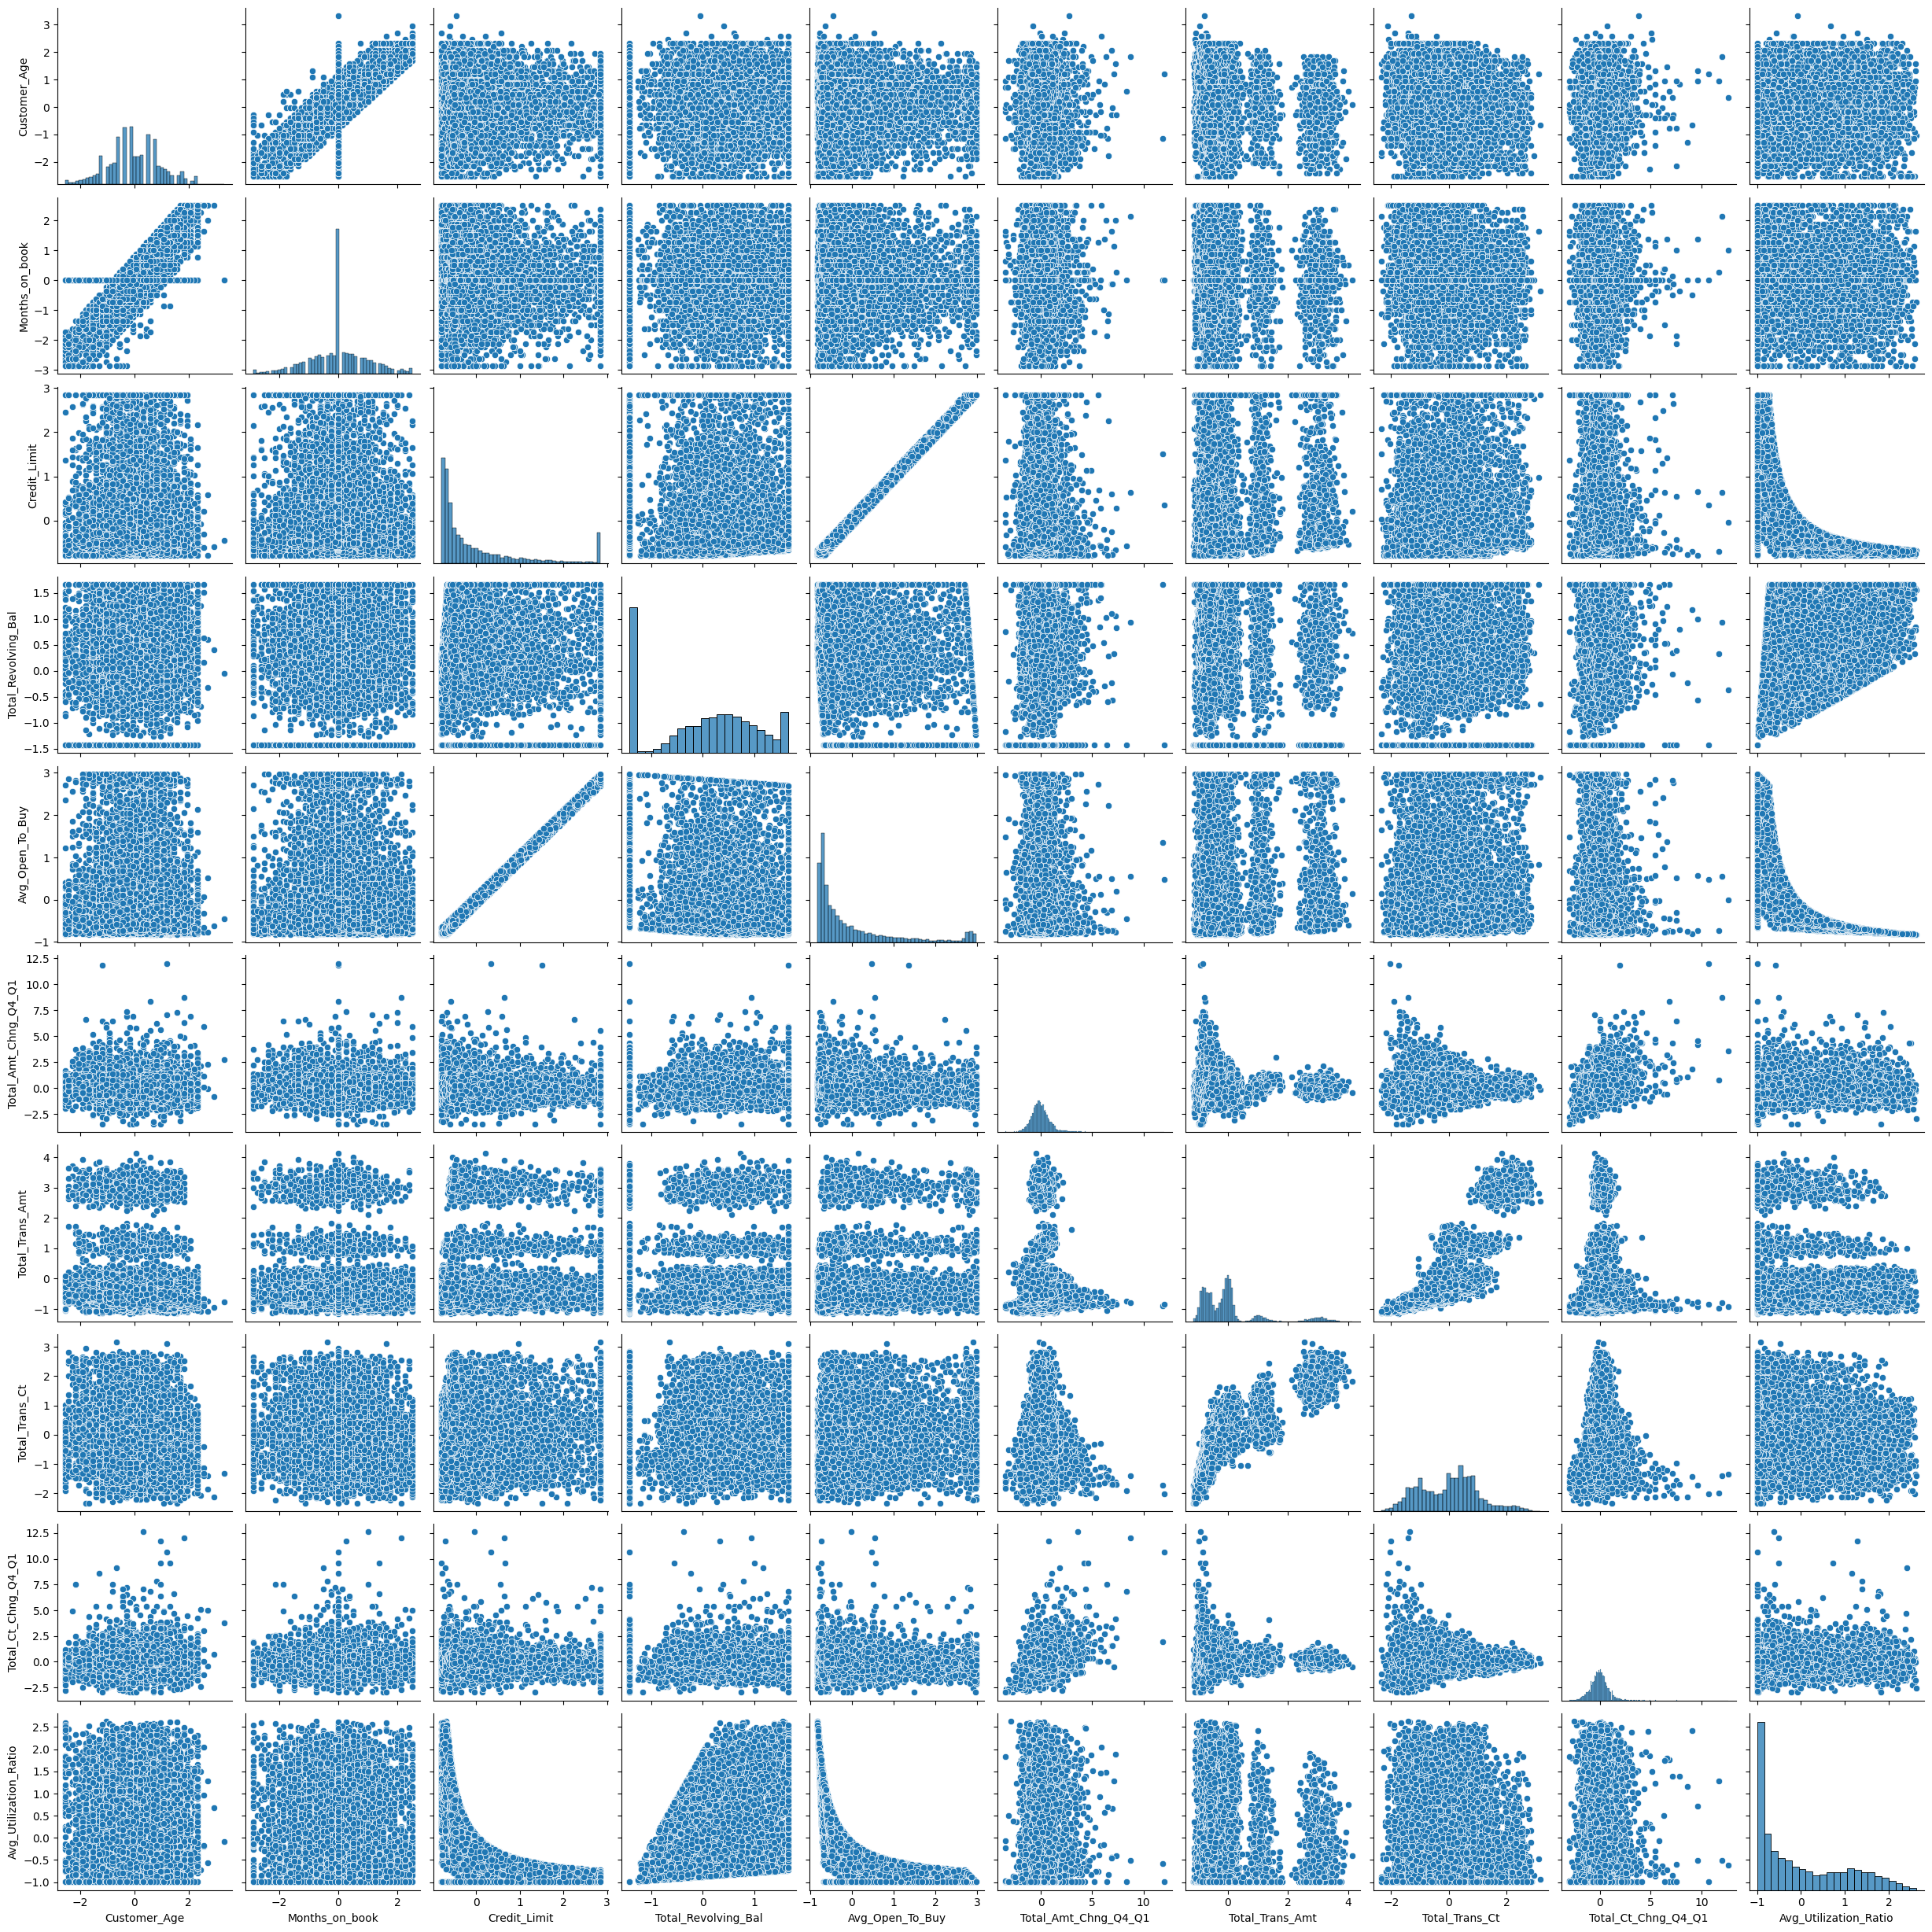

In [15]:
plt.figure(figsize=(20, 20))
sns.pairplot(eda_df)
plt.show()

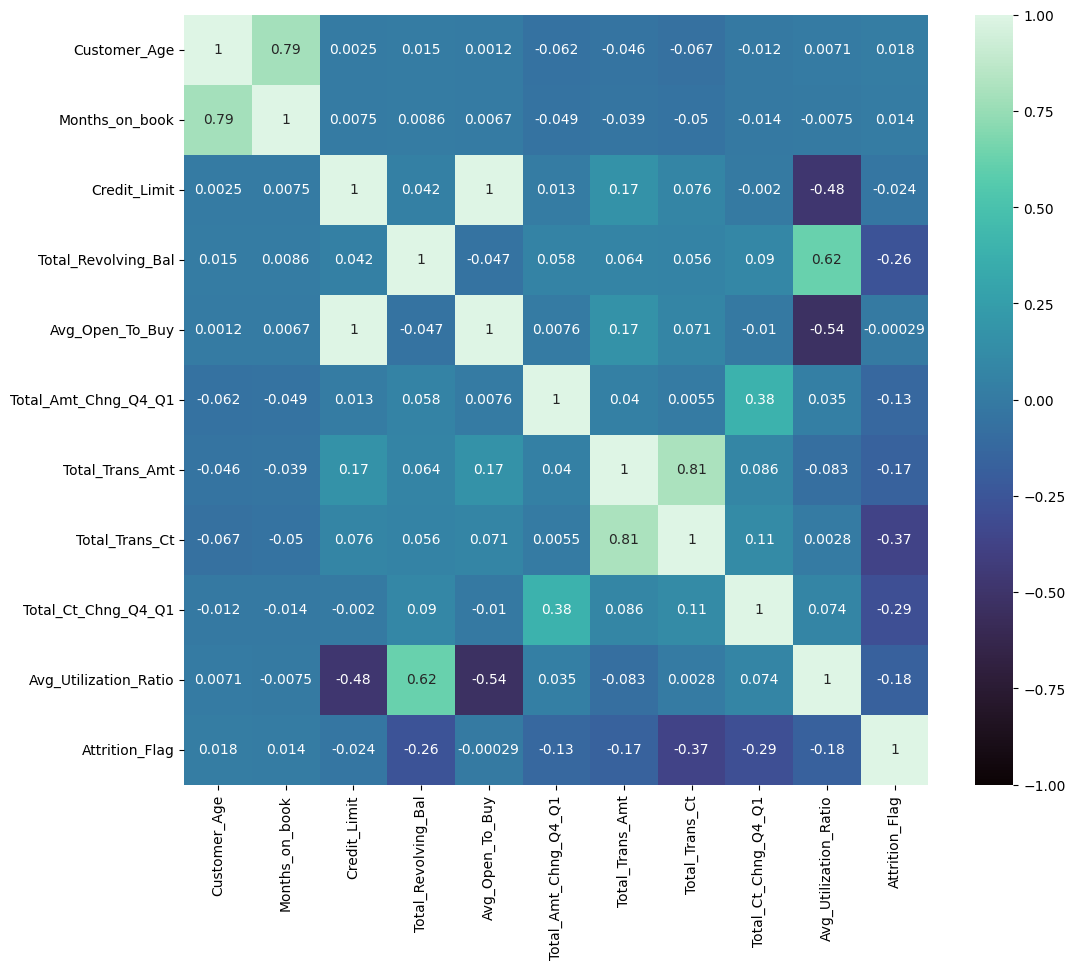

In [16]:
corr = pd.concat([eda_df, y], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [18]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [19]:
keras_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (churn vs. no churn)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
keras_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]


In [22]:
# Train sklearn models
for model in models:
    model.fit(X_train, y_train)

# Train the Keras model separately
keras_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8572 - loss: 0.3851 - val_accuracy: 0.9057 - val_loss: 0.2344
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9033 - loss: 0.2348 - val_accuracy: 0.9191 - val_loss: 0.1993
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9186 - loss: 0.1979 - val_accuracy: 0.9265 - val_loss: 0.1827
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9254 - loss: 0.1758 - val_accuracy: 0.9309 - val_loss: 0.1761
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9332 - loss: 0.1622 - val_accuracy: 0.9314 - val_loss: 0.1796
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9361 - loss: 0.1527 - val_accuracy: 0.9324 - val_loss: 0.1642
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9413 - loss: 0.1450 - val_accuracy: 0.9353 - val_loss: 0.1659
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9441 - loss: 0.1369 - val_accuracy: 0.

In [23]:
model_names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Neural Network"
]

for model, name in zip(models, model_names[:-1]):  # Exclude Neural Network from this loop
    print(f"{name}: {model.score(X_test, y_test) * 100:.4f}%")

# Evaluate the Keras model separately
nn_accuracy = keras_model.evaluate(X_test, y_test, verbose=0)[1]  # Second value is accuracy
print(f"Neural Network: {nn_accuracy * 100:.4f}%")

Logistic Regression: 90.7700%
Support Vector Machine: 93.4353%
Decision Tree: 93.3860%
Random Forest: 96.2981%
Neural Network: 93.6328%


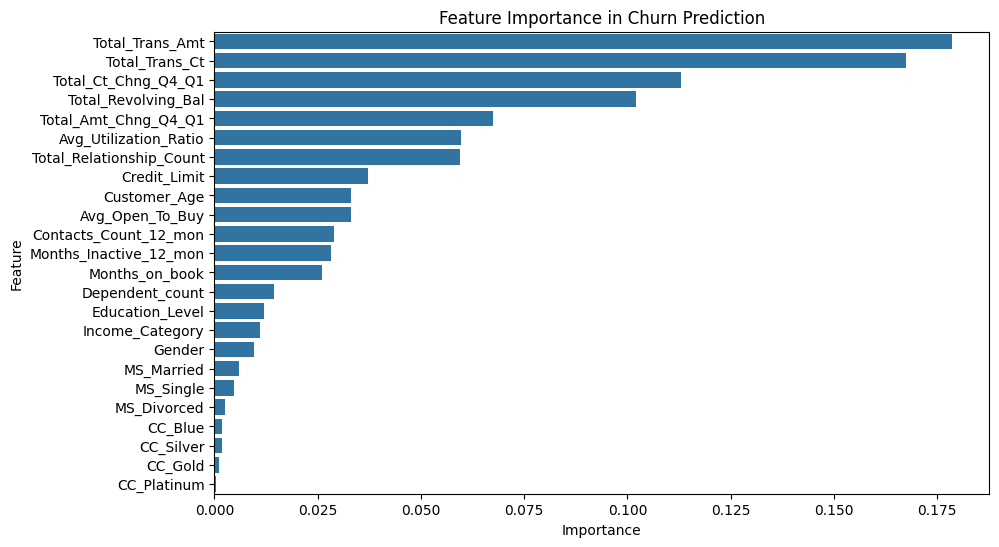

In [27]:
importances = models[3].feature_importances_  # RandomForestClassifier is the 4th model
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df.Importance, y=feature_importance_df.Feature)
plt.title("Feature Importance in Churn Prediction")
plt.show()


In [24]:
import pickle
import sklearn

In [25]:
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib.pyplot Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)
print("Scikit-learn Version:", sklearn.__version__)

NumPy Version: 2.0.2
Pandas Version: 2.2.2
Matplotlib.pyplot Version: 3.10.0
Seaborn Version: 0.13.2
Scikit-learn Version: 1.6.1


In [26]:


# Save traditional ML models
model_filenames = [
    "logistic_regression.pkl",
    "svm.pkl",
    "decision_tree.pkl",
    "random_forest.pkl"
]

for model, filename in zip(models, model_filenames):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

print("✅ Traditional ML models saved successfully!")

# Save the Keras model separately
keras_model.save("neural_network.h5")
print("✅ Keras model saved successfully!")


✅ Traditional ML models saved successfully!
✅ Keras model saved successfully!
